In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
iris_path = './iris_data.csv'

In [6]:
iris_df = pd.read_csv(iris_path)
iris_df.shape

(150, 5)

In [7]:
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
setosa_df = iris_df[iris_df['variety']=='Setosa']
virginica_df = iris_df[iris_df['variety']=='Virginica']
versicolor_df = iris_df.loc[iris_df['variety']=='Versicolor']
versicolor_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


# Mean , SD, Variance 

In [9]:
print(np.mean(setosa_df['petal.length']))
print(np.mean(np.append(setosa_df['petal.length'],50)))
print(np.mean(virginica_df['petal.length']))
print(np.mean(versicolor_df['petal.length']))

1.4620000000000002
2.4137254901960787
5.552
4.26


In [10]:
print(np.std(setosa_df['petal.length']))
print(np.std(np.append(setosa_df['petal.length'],50)))
print(np.std(virginica_df['petal.length']))
print(np.std(versicolor_df['petal.length']))

0.17191858538273286
6.731868010072429
0.5463478745268441
0.4651881339845204


1. Mean, SD and variance easily affected by outliers.
2. Mean talks about balance point where as SD talks about spread of the data.


In [11]:
print(setosa_df['petal.length'].mean(),setosa_df['petal.length'].std(),setosa_df['petal.length'].var())
setosa_df['petal.length'].describe()

1.4620000000000002 0.1736639964801841 0.030159183673469397


count    50.000000
mean      1.462000
std       0.173664
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: petal.length, dtype: float64

# Median, Percentile , Quantile, IQR , MAD

In [12]:

print("median with outlier is : {}".format(np.median(setosa_df['petal.length'])))
print("median without outlier is : {}".format(np.median(np.append(setosa_df['petal.length'],50))))
print("median - Virginica {}".format(np.median(virginica_df['petal.length'])))
print("median - Versicolor {}".format(np.median(versicolor_df['petal.length'])))

median with outlier is : 1.5
median without outlier is : 1.5
median - Virginica 5.55
median - Versicolor 4.35


In [4]:
#%history -g

In [13]:
print('90th percentile - setosa_df: {}'.format(np.percentile(setosa_df['petal.length'],90)))
print('90th percentile - virginica_df : {}'.format(np.percentile(virginica_df['petal.length'],90)))
print('90th percentile - versicolor_df : {}'.format(np.percentile(versicolor_df['petal.length'],90)))

90th percentile - setosa_df: 1.7
90th percentile - virginica_df : 6.3100000000000005
90th percentile - versicolor_df : 4.8


In [14]:
print('Quantiles - setosa_df: {}'.format(np.percentile(setosa_df['petal.length'],np.arange(0,100,25))))
print('Quantiles - virginica_df : {}'.format(np.percentile(virginica_df['petal.length'],np.arange(0,100,25))))
print('Quantiles - versicolor_df : {}'.format(np.percentile(versicolor_df['petal.length'],np.arange(0,100,25))))


Quantiles - setosa_df: [1.    1.4   1.5   1.575]
Quantiles - virginica_df : [4.5   5.1   5.55  5.875]
Quantiles - versicolor_df : [3.   4.   4.35 4.6 ]


In [15]:
from statsmodels import robust
print('Median absolute Deviation')

print(robust.mad(setosa_df['petal.length']))
print(robust.mad(virginica_df['petal.length']))
print(robust.mad(versicolor_df['petal.length']))


Median absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# CONCLUSIONS
1. We can say , mean = median(with out effects of outliers) in the same way MAD is similar to Standard deviation.


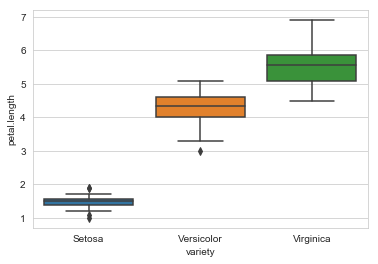

In [16]:
sns.set_style('whitegrid')
sns.boxplot(x='variety',y='petal.length',data= iris_df)
plt.show()

# Observations
1. We can distinguish variety easily by using box-whisker plots.
2. Box-whisker plots has min,Q1,Q2(median),Q3,max values to detect outliers.
3. We can also make modified Box-plots by represnting outliers with IQR, since value less than (Q1 +1.5*IQR) or more than (Q3+ 1.5*IQR) is considered as outliers of the data.
4. IQR = Q3 - Q1 
5. We can also make side by side box-plots to compare 2 data sets with same meanings ( EX: Gender basis analysis uisng box-whisker plots by comparing Male vs Female)
6. We can build rules based model by taking feature petal.length and can make predictions to distinugish the variety.

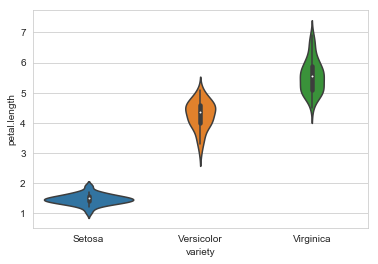

In [18]:
#A violin plot combines the benifits of the previous two plots and simplifies them
#Denser regions of the data are fatter, and sparser ones thinner in a violin plots


sns.set_style('whitegrid')
sns.violinplot(x='variety',y='petal.length',data= iris_df)
plt.show()

#CONCLUSIONS :
1. Violin plots are the combination of histograms (PDF) with box-whisker plots to represent the data by taking best of their above 2 worlds.
2. By this plots we can easily conclude and make predictions by building rules based method on petal.length

#Univariate Analysis : PDF, CDF, Histograms, box-whisker plot, 5-number summary, violin plots
#Bi-variate Analysis : scatter plot, 2d plots
#Multi-variate Analysis : 3D plots, Glorified ML/DL algorithms by analyzing multiple features to make effective predictions.
